In [228]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [230]:
x_train.shape

(50000, 32, 32, 3)

In [231]:
x_test.shape

(10000, 32, 32, 3)

In [232]:
type(x_test)

numpy.ndarray

In [233]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [234]:
print('No. of output labels: ',len(class_labels))

No. of output labels:  10


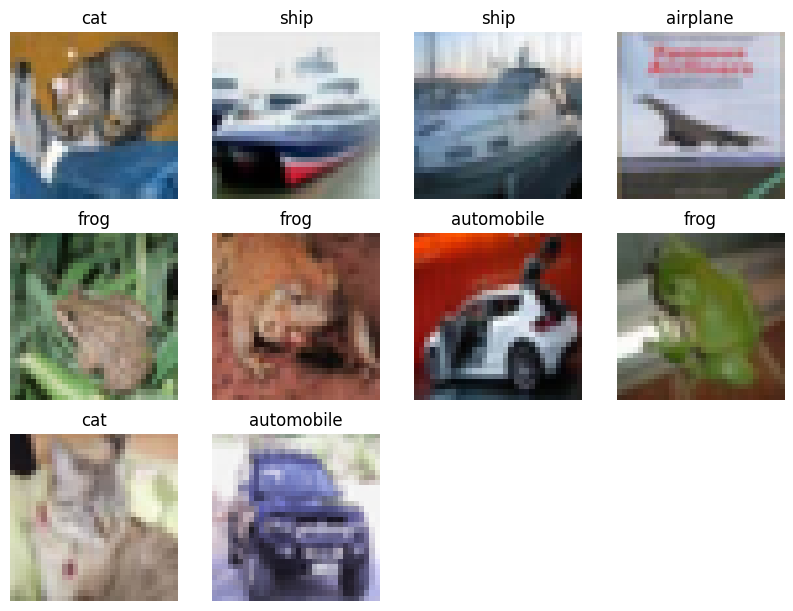

In [235]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(4,4,i+1),
  plt.imshow(x_test[i])
  plt.title(class_labels[y_test[i][0]])
  plt.axis(False)

In [236]:
x_train.shape

(50000, 32, 32, 3)

# Preprocessing

Converting numpy array to Tensorflow object, so to use functions such as cache(), prefetch(),etc.

In [237]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [238]:
len(train_dataset)

50000

In [239]:
type(train_dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [240]:
training_dataset = train_dataset.cache().shuffle(len(x_train)).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Resize and Rescale

In [241]:
resize_and_rescale = keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(32,32),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

DataAugmentation

In [242]:
flip_and_rotate = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

Model Creation

In [263]:
# CNN and Maxpooling
model = keras.models.Sequential([
    # preprocessing
    resize_and_rescale,
    flip_and_rotate,

    # CNN
    keras.layers.Input(shape=(32,32,32,3)),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),         #divides the image in half also removes -3 to -4 pixels

    # zoom
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    # Deep Learning model
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [264]:
model.build(input_shape=(32,32,32,3))

In [265]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_34 (Sequential)  (32, 32, 32, 3)           0         
                                                                 
 sequential_35 (Sequential)  (32, 32, 32, 3)           0         
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 conv2d_45 (Conv2D)          (32, 30, 30, 32)          896       
                                                                 
 max_pooling2d_45 (MaxPooli  (32, 15, 15, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (32, 13, 13, 64)          18496     
                                                     

In [266]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [267]:
len(training_dataset)

50000

In [270]:
history = model.fit(
    training_dataset,
    epochs=50,
    batch_size=32,
    validation_data=validation_dataset
)

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_38' (type Sequential).
    
    Input 0 of layer "conv2d_45" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 32, 3)
    
    Call arguments received by layer 'sequential_38' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


In [ ]:
model.evaluate(testing_dataset)